Epoch [10/100], Loss: 0.3030
Epoch [20/100], Loss: 0.3766
Epoch [30/100], Loss: 0.4673
Epoch [40/100], Loss: 0.4290
Epoch [50/100], Loss: 0.5575
Epoch [60/100], Loss: 0.5064
Epoch [70/100], Loss: 0.3369
Epoch [80/100], Loss: 0.2432
Epoch [90/100], Loss: 0.6827
Epoch [100/100], Loss: 0.6335
Epoch [10/100], Loss: 0.2855
Epoch [20/100], Loss: 0.5008
Epoch [30/100], Loss: 0.8851
Epoch [40/100], Loss: 0.2548
Epoch [50/100], Loss: 0.5331
Epoch [60/100], Loss: 0.4182
Epoch [70/100], Loss: 0.3123
Epoch [80/100], Loss: 0.2088
Epoch [90/100], Loss: 0.6065
Epoch [100/100], Loss: 0.3512


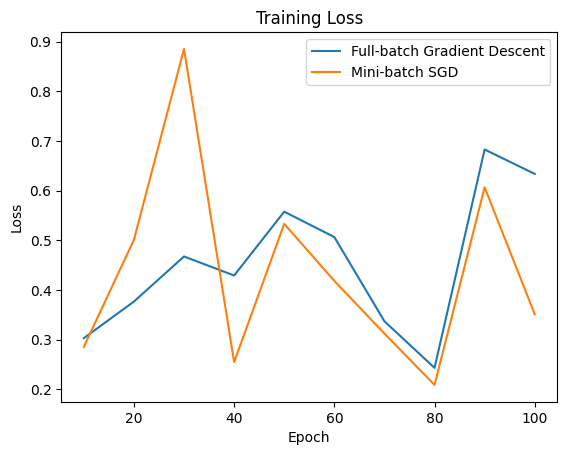

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# Load the MNIST dataset, filtering for the digits 3 and 8
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
indices = [i for i, (x, y) in enumerate(mnist_train) if y in {3, 8}]
mnist_subset = Subset(mnist_train, indices)

# DataLoader
batch_size = 10
train_loader = DataLoader(mnist_subset, batch_size=batch_size, shuffle=True)


# Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


# Initialize model, loss function, and optimizer
input_size = 28 * 28  # MNIST image size (flattened)
model = LogisticRegressionModel(input_size)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer_sgd = optim.SGD(
    model.parameters(), lr=0.001, weight_decay=1
)  # L2 regularization


# Training function
def train_model(optimizer, num_epochs=100):
    losses = []

    for epoch in range(num_epochs):
        for X, y in train_loader:
            X = X.view(-1, input_size)  # Flatten
            y = (y == 3).float().view(-1, 1)  # Convert labels: 3 -> 1, 8 -> 0

            # Forward pass
            outputs = model(X)
            loss = criterion(outputs, y)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            losses.append(loss.item())
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    return losses


# Train with full batch gradient descent
optimizer_full_batch = optim.SGD(model.parameters(), lr=0.001, weight_decay=1)
losses_full_batch = train_model(optimizer_full_batch)

# Train with mini-batch SGD
optimizer_mini_batch = optim.SGD(model.parameters(), lr=0.001, weight_decay=1)
losses_mini_batch = train_model(optimizer_mini_batch)

# Plotting
epochs = np.arange(10, 110, 10)
plt.plot(epochs, losses_full_batch, label="Full-batch Gradient Descent")
plt.plot(epochs, losses_mini_batch, label="Mini-batch SGD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()